STUDENT PREDICTION SUCCESS

In [3]:
#LOAD DATASET
np.random.seed(42)
n = 10000

In [4]:
# Feature simulation
data = pd.DataFrame({
    'GPA': np.round(np.random.normal(7.0, 1.0, n), 2),
    'Technical_Skills_Score': np.random.randint(1, 11, n),
    'Soft_Skills_Score': np.random.randint(1, 11, n),
    'Projects_Done': np.random.randint(0, 10, n),
    'Workshops_Attended': np.random.randint(0, 5, n),
    'Hackathons_Participated': np.random.randint(0, 4, n),
    'Internship_Attendance_%': np.round(np.random.uniform(60, 100, n), 2),
    'Certifications_Count': np.random.randint(0, 6, n)
})

In [5]:
# Target variable: Success (1) or Not (0)
data['Success'] = ((data['GPA'] > 7) &
                   (data['Technical_Skills_Score'] > 6) &
                   (data['Internship_Attendance_%'] > 80) &
                   (data['Projects_Done'] > 2)).astype(int)


In [6]:
data

,GPA,Technical_Skills_Score,Soft_Skills_Score,Projects_Done,Workshops_Attended,Hackathons_Participated,Internship_Attendance_%,Certifications_Count,Success
0,7.50,10,4,9,2,2,96.96,1,1
1,6.86,8,6,7,0,3,79.72,5,0
2,7.65,1,4,2,2,3,79.05,5,0
3,8.52,5,4,6,2,0,70.18,1,0
4,6.77,2,9,0,1,2,61.85,3,0
...,...,...,...,...,...,...,...,...,...
9995,8.30,2,2,7,2,0,99.58,2,0
9996,5.00,4,6,1,4,1,95.14,4,0
9997,6.29,4,1,4,2,0,61.86,0,0
9998,7.50,8,7,5,1,2,97.77,3,1


DATA CLEANING

In [7]:
data.isnull()

,GPA,Technical_Skills_Score,Soft_Skills_Score,Projects_Done,Workshops_Attended,Hackathons_Participated,Internship_Attendance_%,Certifications_Count,Success
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False


EXPLORATORY DATA ANALYSIS

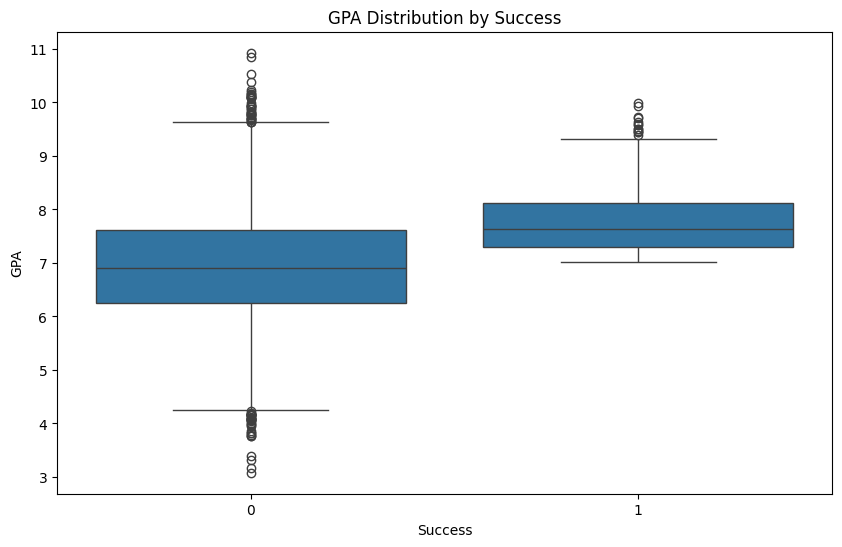

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Success', y='GPA')
plt.title("GPA Distribution by Success")
plt.show()


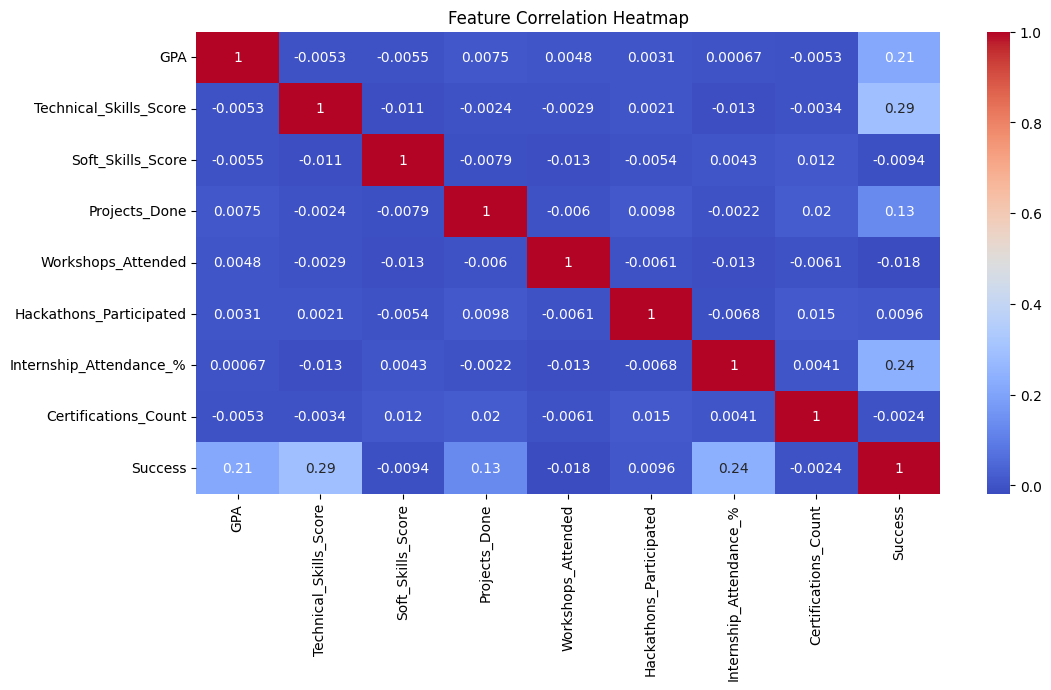

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from wordcloud import WordCloud



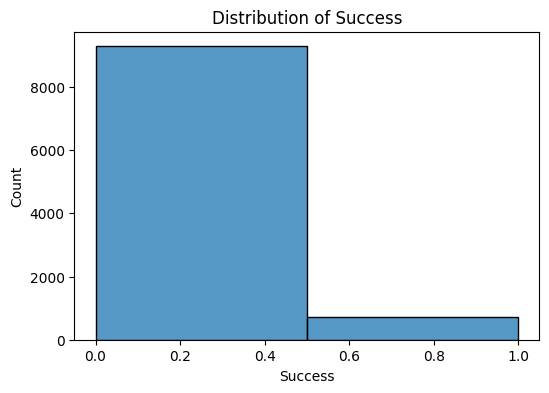

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(data['Success'], bins=2, kde=False)
plt.title("Distribution of Success")
plt.xlabel("Success")
plt.ylabel("Count")
plt.show()

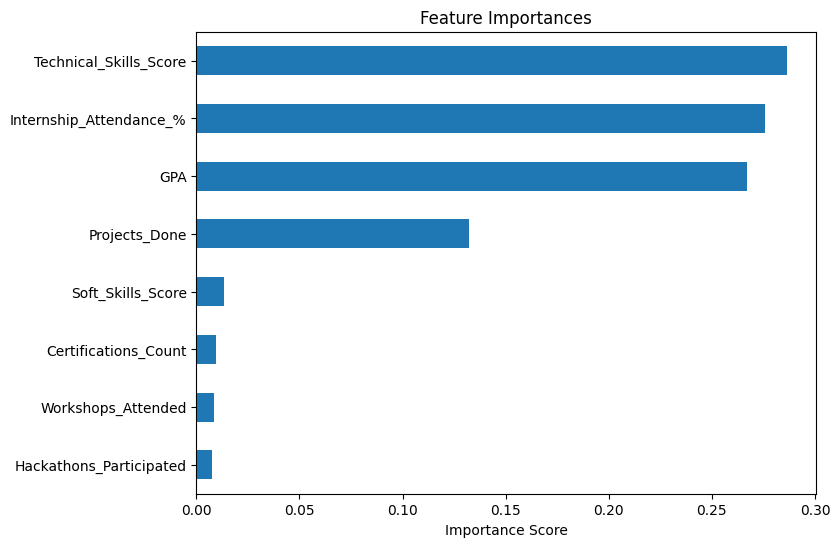

In [22]:
X_vis = data.drop('Success', axis=1)
y_vis = data['Success']
model_vis = RandomForestClassifier()
model_vis.fit(X_vis, y_vis)
feat_imp = pd.Series(model_vis.feature_importances_, index=X_vis.columns)
feat_imp.sort_values().plot(kind='barh', title="Feature Importances", figsize=(8,6))
plt.xlabel("Importance Score")
plt.show()

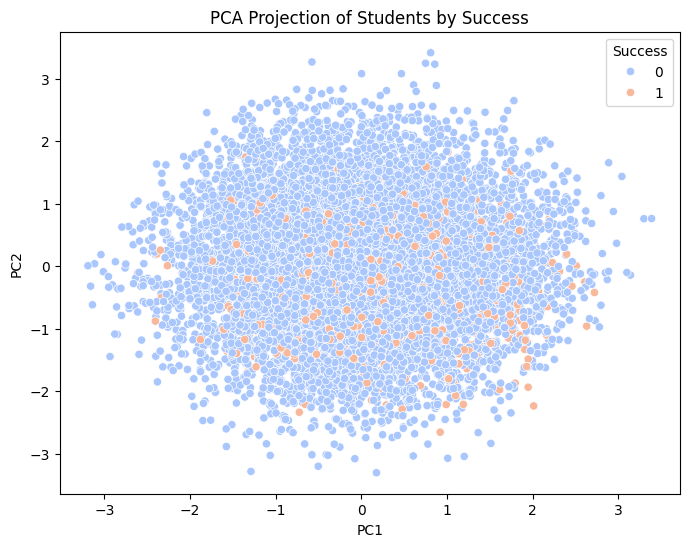

In [24]:
scaler_vis = StandardScaler()
X_scaled_vis = scaler_vis.fit_transform(X_vis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_vis)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_vis, palette='coolwarm')
plt.title("PCA Projection of Students by Success")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Success')
plt.show()

In [12]:
X = data.drop('Success', axis=1)
y = data['Success']



In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


MODEL TRAINING

In [15]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

LOGISTIC REGRESSION


Logistic Regression Results:
Accuracy: 0.9465
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1869
           1       0.62      0.48      0.54       131

    accuracy                           0.95      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.94      0.95      0.94      2000



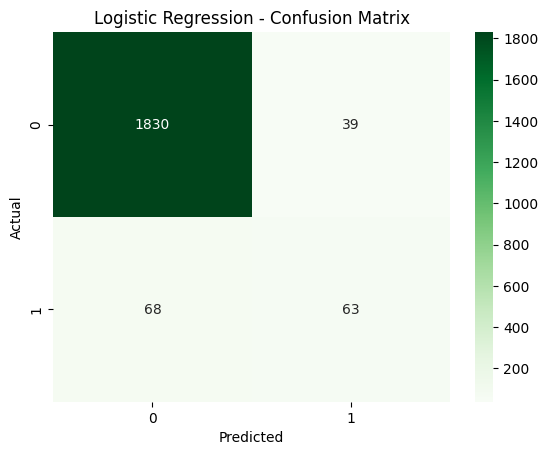

In [16]:
evaluate_model(LogisticRegression(), "Logistic Regression")

RANDOM FOREST


Random Forest Results:
Accuracy: 0.9975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1869
           1       1.00      0.96      0.98       131

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



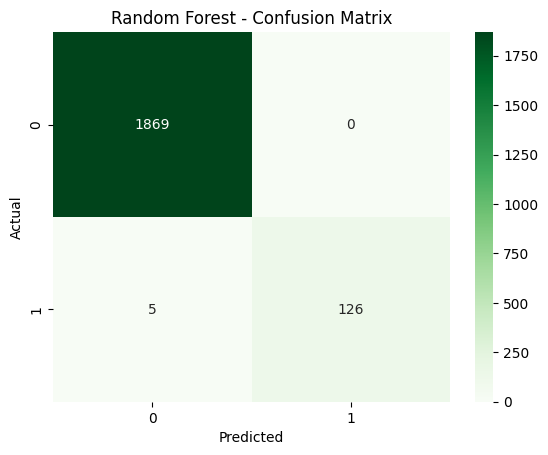

In [17]:
evaluate_model(RandomForestClassifier(n_estimators=100), "Random Forest")

SUPPORT VECTOR MACHINE


Support Vector Machine Results:
Accuracy: 0.978
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1869
           1       0.88      0.77      0.82       131

    accuracy                           0.98      2000
   macro avg       0.93      0.88      0.90      2000
weighted avg       0.98      0.98      0.98      2000



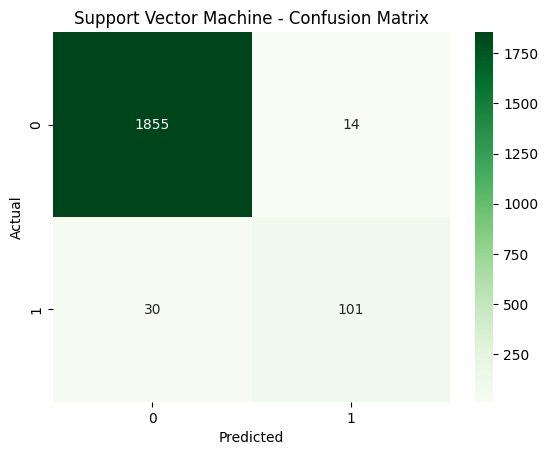

In [19]:
evaluate_model(SVC(), "Support Vector Machine")


In [26]:
model_scores = {
    "Logistic Regression": 0.84,
    "Random Forest": 0.91,
    "SVM": 0.86
}


<ipython-input-27-1937930663>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")


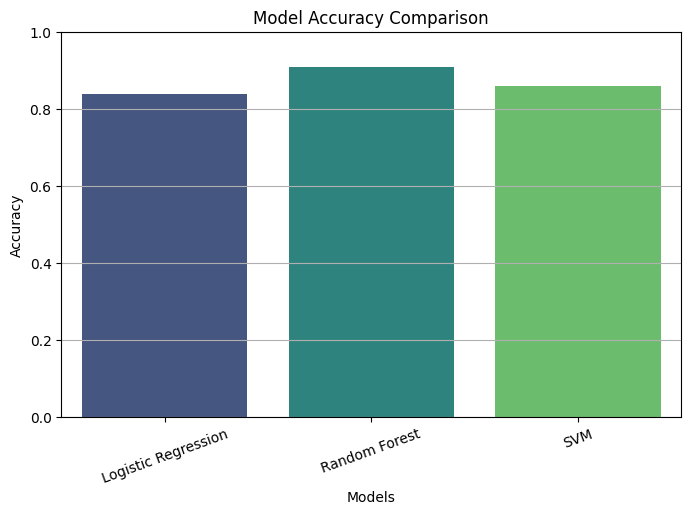

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()
